In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np


In [2]:
hoy = pd.to_datetime('today').normalize()  # normaliza a 00:00:00

fecha_inicio = '2025-05-15'
fechas = pd.date_range(start=fecha_inicio, end=hoy, freq='D')
serie_fechas = pd.Series(fechas)

fecha_inicio_saltos = '2025-05-20'
fechas_saltos = pd.date_range(start=fecha_inicio_saltos, end=hoy, freq='7D')
serie_fechas_saltos = pd.Series(fechas_saltos)

fecha_inicio_saltos_2 = '2025-06-03'
fechas_saltos_2 = pd.date_range(start=fecha_inicio_saltos_2, end=hoy, freq='7D')
serie_fechas_saltos_2 = pd.Series(fechas_saltos_2)

dolor_mañanero = pd.Series([3,2,2,1,1,0,3,2,4,3,4,5,4,3,2,2,2,4,3,1,1,1,1,1,1,1,1,2,4,5,4,3,2,1,3])

dolor_DL = pd.Series([2,3,2,4,4])
dolor_SL_izq = pd.Series([9,9,9,10,10])
dolor_SL_desplazamiento = pd.Series([8,9,None])

dias_correr = pd.Series([0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0])
dias_ejercicio_fuerza = pd.Series([0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1])

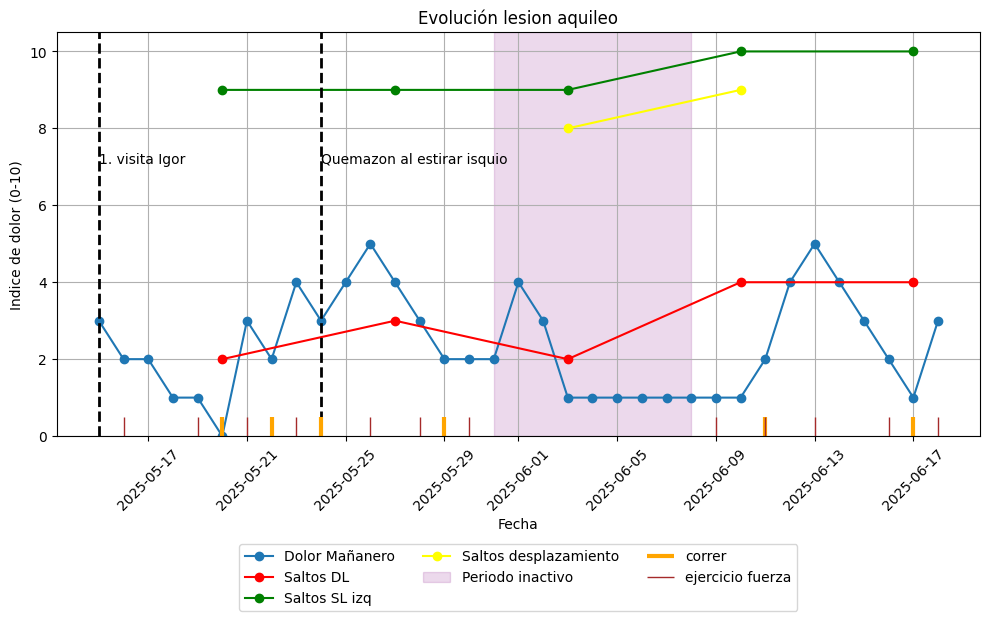

In [3]:
plt.figure(figsize=(10, 5))  # tamaño opcional del gráfico
plt.plot(serie_fechas, dolor_mañanero, marker='o', linestyle='-', label='Dolor Mañanero')  # línea con puntos
plt.plot(serie_fechas_saltos, dolor_DL, marker='o', color='red', label='Saltos DL')  # línea con puntos
plt.plot(serie_fechas_saltos, dolor_SL_izq, marker='o', color='green', label='Saltos SL izq')  # línea con puntos
plt.plot(serie_fechas_saltos_2, dolor_SL_desplazamiento, marker='o', color='yellow', label='Saltos desplazamiento')  # línea con puntos

plt.axvspan(pd.Timestamp('2025-05-31'), pd.Timestamp('2025-06-08'), color='purple', alpha=0.15, label='Periodo inactivo')

plt.axvline(pd.Timestamp('2025-05-15'), color='black', linestyle='--', linewidth=2)
plt.text(pd.Timestamp('2025-05-15'), 7, '1. visita Igor', verticalalignment='bottom', horizontalalignment='left', color='black')

plt.axvline(pd.Timestamp('2025-05-24'), color='black', linestyle='--', linewidth=2)
plt.text(pd.Timestamp('2025-05-24'), 7, 'Quemazon al estirar isquio', verticalalignment='bottom', horizontalalignment='left', color='black')

label = True
for fecha, tick in zip(serie_fechas, dias_correr):
    if tick == 1:
        if label:
            plt.vlines(x=fecha, ymin=0, ymax=0.5, color='orange', linewidth=3, label='correr')
            label = False
        else:
            plt.vlines(x=fecha, ymin=0, ymax=0.5, color='orange', linewidth=3)

label = True
for fecha, tick in zip(serie_fechas, dias_ejercicio_fuerza):
    if tick == 1:
        if label:
            plt.vlines(x=fecha, ymin=0, ymax=0.5, color='brown', linewidth=1, label='ejercicio fuerza')
            label = False
        else:
            plt.vlines(x=fecha, ymin=0, ymax=0.5, color='brown', linewidth=1)

plt.xlabel('Fecha')
plt.ylabel('Indice de dolor (0-10)')
plt.ylim([0, 10.5]) 
plt.title('Evolución lesion aquileo')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # rota etiquetas del eje x para mejor lectura
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=3)
plt.show()